# Tutorial 04: ERPparam attributes and methods

This tutorial describes pertinent attributes of the ERPparam class, and helpful functions for extracting and organizing the results of the model fit.

In [6]:
# imports

# standard
import numpy as np
import matplotlib.pyplot as plt

# ERPparam
import sys
sys.path.append('../')
from ERPparam.tests.tutils import default_params
from ERPparam.sim import simulate_erp
from ERPparam import ERPparam
from ERPparam.plts import plot_signals
from ERPparam.plts.annotate import plot_annotated_peak_search


In [2]:
# settings

# set the random seed for reproducibility
np.random.seed(4)

### Generate Model


Again, we will begin by simulating an example event-related potential (ERP), and we will fit a model on this simulated signal.

                                                                                                  
                                             ERP MODEL                                            
                                                                                                  
                                       2 peaks were found:                                        
                 Time:   0.10, Amp:   1.96, Dur:  0.05, Sym: 0.55, Sharp: 0.9793                  
                 Time:   0.21, Amp:  -1.49, Dur:  0.09, Sym: 0.50, Sharp: 0.9568                  
                                                                                                  
                                     Goodness of fit metrics:                                     
                                    R^2 of model fit is 0.9727                                    
                                    Error of the fit is 0.0968                                    
          

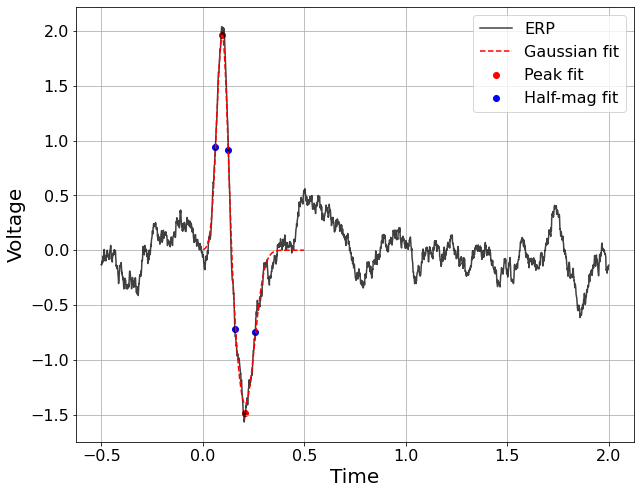

In [10]:
# simulate, fit, and plot an ERP
time_range, erp_params, nlv = default_params()
time, erp = simulate_erp(time_range, erp_params, nlv)

# fit model and plot
model = ERPparam(peak_threshold=5, gauss_overlap_thresh=3, min_peak_height=0.5)
model.report(time, erp, time_range=(0,0.5))

## Notable Attributes

* the `uncropped_time` and `uncropped_signal` attributes are the original signal input by the user, without any time windows subselected from it. If there is no `time_range` specified, the whole time range of the ERP will be fit and `uncropped_signal` will be the same as `signal`
* the `time` and `signal` attributes are the timepoints and signal segment that the fitting procedure was conducted on
* the `baseline_signal` and the `baseline` attribute document the time range used for the baseline window, as well as the signal found in that time range. 
* the `r_squared` and `adj_r_squared` attributes give the model fit quality of the gaussian fits, where `adj_r_squared` is penalized for additional parameters to the model fit. The error is given by the `error_` attribute.
* the estimated gaussian and shape features are stored in the `gaussian_params_` and `shape_params_` attributes, respectively.
* the `peak_indices_` attribute documents at which index of `signal` each peak can be found.
* the `has_model` and the `n_peaks_` attributes indicate whether a model was successfully fit (including the successful calculation of shape parameters), and if so, how many peaks were detected.

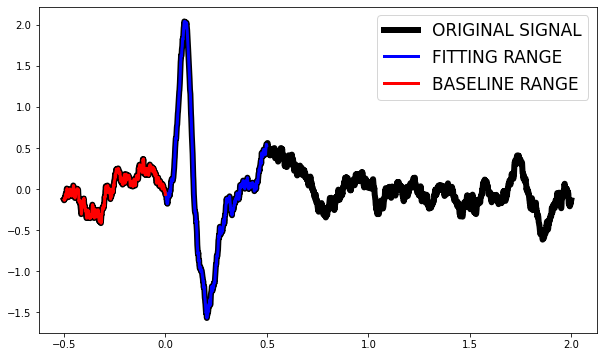

In [ ]:
plt.subplots(figsize=(10,6))

## plot the original signal 
plt.plot(model.uncropped_time, model.uncropped_signal, color='k', linewidth=6, label = 'ORIGINAL SIGNAL')

## plot the cropped signal (the range used for fitting)
plt.plot(model.time, model.signal, color='b',linewidth=3, label= 'FITTING RANGE')

## plot the baseline time range
baseline_time = model.uncropped_time[(model.uncropped_time > model.baseline[0]) & (model.uncropped_time < 0.0001)] # get the time array for the baseline signal only
plt.plot(baseline_time, model.baseline_signal, color='r',linewidth=3, label= 'BASELINE RANGE')

plt.legend(fontsize=17)

In [75]:
print(f"R-Squared of the gaussian fit: {model.r_squared_}")
# print(f"Adjusted R-Squared of the gaussian fit: {model.adj_r_squared}")
print(f"Error of the gaussian fit: {model.error_}")
print(f"Number of peaks fit: {model.n_peaks_}")
print(f"Succesful fit: {model.has_model}")

R-Squared of the gaussian fit: 0.9726884589064287
Error of the gaussian fit: 0.09676518217055358
Number of peaks fit: 2
Succesful fit: True


In [71]:
print(f"Finalized gaussian params:\n {model.gaussian_params_}")
print(f"\tShape (n_peaks, n_params): {model.gaussian_params_.shape}")
print(f"\nFinalized shape params:\n {model.shape_params_}")
print(f"\tShape (n_peaks, n_params): {model.shape_params_.shape}")
print(f"\nFinalized peak indices (index of the start, center, and end index of each peak in model.signal):\n {model.peak_indices_}")

Finalized gaussian params:
 [[ 0.09676716  2.04027001  0.02748338         nan]
 [ 0.20847645 -1.40467903  0.0467637          nan]]
	Shape (n_peaks, n_params): (2, 4)

Finalized shape params:
 [[ 0.097       1.96298627  0.05496676         nan  0.064       0.035
   0.029       0.546875    0.97925158  0.97730778  0.98119538]
 [ 0.208      -1.4864333   0.09352741         nan  0.101       0.05
   0.051       0.4950495   0.95680944  0.95723576  0.95638312]]
	Shape (n_peaks, n_params): (2, 11)

Finalized peak indices (index of the start, center, and end index of each peak in model.signal):
 [[ 62  97 126]
 [158 208 259]]


## Notable Methods

### get_results()

The `get_results()` function returns an `ERPparamResults` object, which contains gaussian and shape params, as well as our goodness of fit metrics. The optional argument `param_names` (default False) yields a dictionary of the shape and gaussian parameters, as well as brief description of each.

In [80]:
model.get_results()

ERPparamResults(r_squared=0.9726884589064287, error=0.09676518217055358, gaussian_params=array([[ 0.09676716,  2.04027001,  0.02748338,         nan],
       [ 0.20847645, -1.40467903,  0.0467637 ,         nan]]), shape_params=array([[ 0.097     ,  1.96298627,  0.05496676,         nan,  0.064     ,
         0.035     ,  0.029     ,  0.546875  ,  0.97925158,  0.97730778,
         0.98119538],
       [ 0.208     , -1.4864333 ,  0.09352741,         nan,  0.101     ,
         0.05      ,  0.051     ,  0.4950495 ,  0.95680944,  0.95723576,
         0.95638312]]), peak_indices=array([[ 62,  97, 126],
       [158, 208, 259]]))

In [85]:
_, pn = model.get_results(param_names=True)
pn

{'shape_params': {'CT': 'Center time of the peak, calculated from the raw signal',
  'PW': 'Peak amplitude, calculate from the raw signal',
  'BW': 'Bandwidth of the peak, 2-sided (ie, both halves from the peak center), calculated from the raw signal',
  'SK': 'Skewness of the peak',
  'FWHM': 'full width at half magnitude',
  'rise_time': 'time between peak and rising half-magnitude point',
  'decay_time': 'time between peak and decaying half-magnitude point',
  'symmetry': 'rise time / FWHM',
  'sharpness': 'peak sharpness (normalized to be dimensionless 0-1)',
  'sharpness_rise': 'sharpness of the rise (normalized to be dimensionless 0-1)',
  'sharpness_decay': 'sharpness of the decay (normalized to be dimensionless 0-1)'},
 'gaussian_params': {'MN': 'mean of the gaussian',
  'HT': 'height of the gaussian',
  'SD': 'gaussian width',
  'SK': 'skewness of the gaussian'}}

### get_params()

`get_params()` selects specific parameters from the suite of gaussian or shape parameters. It takes a first input, chosen from the list of [`gaussian_params`, `shape_params`, `error`, or `r_squared`], and an option additonal parameter type. 
The viable parameter name strings corresponding to the possible gaussian or shape parameters are as follows:

In [87]:
pn

{'shape_params': {'CT': 'Center time of the peak, calculated from the raw signal',
  'PW': 'Peak amplitude, calculate from the raw signal',
  'BW': 'Bandwidth of the peak, 2-sided (ie, both halves from the peak center), calculated from the raw signal',
  'SK': 'Skewness of the peak',
  'FWHM': 'full width at half magnitude',
  'rise_time': 'time between peak and rising half-magnitude point',
  'decay_time': 'time between peak and decaying half-magnitude point',
  'symmetry': 'rise time / FWHM',
  'sharpness': 'peak sharpness (normalized to be dimensionless 0-1)',
  'sharpness_rise': 'sharpness of the rise (normalized to be dimensionless 0-1)',
  'sharpness_decay': 'sharpness of the decay (normalized to be dimensionless 0-1)'},
 'gaussian_params': {'MN': 'mean of the gaussian',
  'HT': 'height of the gaussian',
  'SD': 'gaussian width',
  'SK': 'skewness of the gaussian'}}

In [ ]:
## returns an array, with one entry for each peak
model.get_params('gaussian_params','MN')

array([0.09676716, 0.20847645])

In [88]:
model.get_params('shape_params','symmetry')

array([0.546875 , 0.4950495])

In [ ]:
## returns the r-squared 
model.get_params('r_squared')

0.9726884589064287

### get_filtered_params